In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv(r"C:\Users\User\Desktop\Churn_Modelling.csv")  

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='Age'>

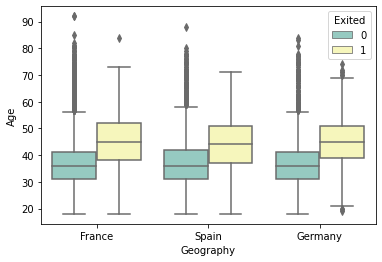

In [9]:
sns.boxplot(x="Geography", y ='Age', hue="Exited", data=dataset, palette="Set3")

<AxesSubplot:xlabel='Exited', ylabel='count'>

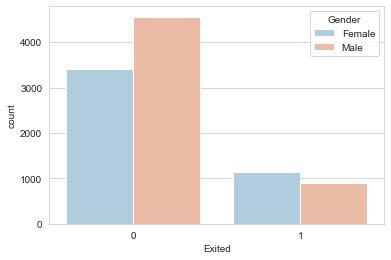

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Exited', hue="Gender", data=dataset,palette='RdBu_r')

In [11]:
X = dataset.iloc[:, 3:-1].values

In [13]:
y = dataset.iloc[:, -1].values

In [14]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [15]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [17]:
le

LabelEncoder()

In [18]:
X[:, 2]

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [1])])

In [21]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
sc

StandardScaler()

In [26]:
X_train

array([[ 1.00053348, -0.57776083, -0.57735027, ..., -1.53973586,
         0.96978946, -1.38284424],
       [-0.99946681,  1.73082   , -0.57735027, ...,  0.64946204,
        -1.03115165, -1.19589044],
       [ 1.00053348, -0.57776083, -0.57735027, ..., -1.53973586,
        -1.03115165, -0.68342242],
       ...,
       [ 1.00053348, -0.57776083, -0.57735027, ..., -1.53973586,
        -1.03115165, -0.14675423],
       [ 1.00053348, -0.57776083, -0.57735027, ...,  0.64946204,
        -1.03115165, -0.0548954 ],
       [-0.99946681,  1.73082   , -0.57735027, ...,  0.64946204,
         0.96978946, -0.81796934]])

In [27]:
X_test

array([[-0.99946681,  1.73082   , -0.57735027, ..., -1.53973586,
        -1.03115165, -1.02282685],
       [ 1.00053348, -0.57776083, -0.57735027, ...,  0.64946204,
         0.96978946,  0.79406925],
       [-0.99946681, -0.57776083,  1.73205081, ...,  0.64946204,
        -1.03115165, -0.73145656],
       ...,
       [ 1.00053348, -0.57776083, -0.57735027, ...,  0.64946204,
         0.96978946, -1.60428715],
       [ 1.00053348, -0.57776083, -0.57735027, ..., -1.53973586,
        -1.03115165, -0.33658579],
       [-0.99946681,  1.73082   , -0.57735027, ...,  0.64946204,
         0.96978946, -0.73379302]])

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [29]:
predictions = logistic_regression.predict(X_test)

In [30]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.54      0.20      0.29       497

    accuracy                           0.81      2500
   macro avg       0.68      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500



In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1920   83]
 [ 399   98]]


0.8072